In [ ]:
!pip install pandas seaborn

# Exploratory Data Analysis

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

plt.style.use('ggplot')
pd.options.display.width = 0

sns.set_style("whitegrid", {"grid.color": "#cbd2d9"})

mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.facecolor'] = '#eeede9'
mpl.rcParams['figure.facecolor'] = '#eeede9'

rc('font',**{'family':'sans-serif','sans-serif':['DM Sans']})
rc('text', usetex=True)

In [2]:
estab_edu_df = pd.read_csv('establishment-via-educational.csv')
needed_personnel = pd.read_csv('needed-ict-personnel.csv')

In [58]:
watermark_text = "Made by Chanakan, Data from https://nso.go.th"

## Data Cleaning

In [4]:
columns_to_clean = ['Area', 'Economic activity', 'Size of establishment', 'Division of industry']

for column in columns_to_clean:
    estab_edu_df[column] = estab_edu_df[column].str.replace(r'^\d+\)\s+', '', regex=True)

In [5]:
estab_edu_df

,Year,Area,Economic activity,Size of establishment,Division of industry,Level of education IT personal (Total),Lower high vocational,High vocational certificate,Bachelor's degree,Master's degree,Doctorate and higher degree
0,2020,Municipal Area,"Libraries, archives, museums and other cult...",1 - 10 persons,"Libraries, archives, museums and other cultura...",1.5000,0.0000,0.0000,1.5000,0.0,0.0
1,2020,Municipal Area,"Libraries, archives, museums and other cult...",1 - 10 persons,Total,1.5000,0.0000,0.0000,1.5000,0.0,0.0
2,2020,Municipal Area,"Libraries, archives, museums and other cult...",11 - 15 persons,"Libraries, archives, museums and other cultura...",0.0000,0.0000,0.0000,0.0000,0.0,0.0
3,2020,Municipal Area,"Libraries, archives, museums and other cult...",11 - 15 persons,Total,0.0000,0.0000,0.0000,0.0000,0.0,0.0
4,2020,Municipal Area,"Libraries, archives, museums and other cult...",16 - 25 persons,"Libraries, archives, museums and other cultura...",0.0000,0.0000,0.0000,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11156,2013,Total,Information and Communication,Total,Programming and broadcasting activities,111.9083,2.0000,19.6250,87.6167,0.0,0.0
11157,2013,Total,Information and Communication,Total,Telecommunications,6496.2678,16.0572,694.4376,3767.7173,0.0,0.0
11158,2013,Total,Information and Communication,Total,"Computer programming, consultancy and related ...",6651.6648,15.8889,352.6189,5472.1660,0.0,0.0
11159,2013,Total,Information and Communication,Total,Information service activities,227.9995,12.3333,21.3333,186.9997,0.0,0.0


In [6]:
estab_edu_df.describe()

,Year,Level of education IT personal (Total),Lower high vocational,High vocational certificate,Bachelor's degree,Master's degree,Doctorate and higher degree
count,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000
mean,2016.299346,672.712748,55.148501,133.355518,441.552325,34.788726,1.977835
std,2.269537,3662.529696,481.648508,987.123840,2319.902972,209.515462,14.824455
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,3.818200,0.000000,0.000000,2.000000,0.000000,0.000000
50%,2016.000000,39.000000,0.000000,4.000000,26.419000,0.000000,0.000000
75%,2018.000000,236.416800,5.666700,36.333200,155.977700,7.000000,0.000000
max,2020.000000,87190.029100,17882.354000,32480.151800,63047.905200,6178.135400,350.789900


In [7]:
estab_edu_df.dtypes

Year                                        int64
Area                                       object
Economic activity                          object
Size of establishment                      object
Division of industry                       object
Level of education IT personal (Total)    float64
Lower high vocational                     float64
High vocational certificate               float64
Bachelor's degree                         float64
Master's degree                           float64
Doctorate and higher degree               float64
dtype: object

In [8]:
estab_edu_df['Bachelor\'s degree']

0            1.5000
1            1.5000
2            0.0000
3            0.0000
4            0.0000
            ...    
11156       87.6167
11157     3767.7173
11158     5472.1660
11159      186.9997
11160    11207.6946
Name: Bachelor's degree, Length: 11161, dtype: float64

# Visualizing Data

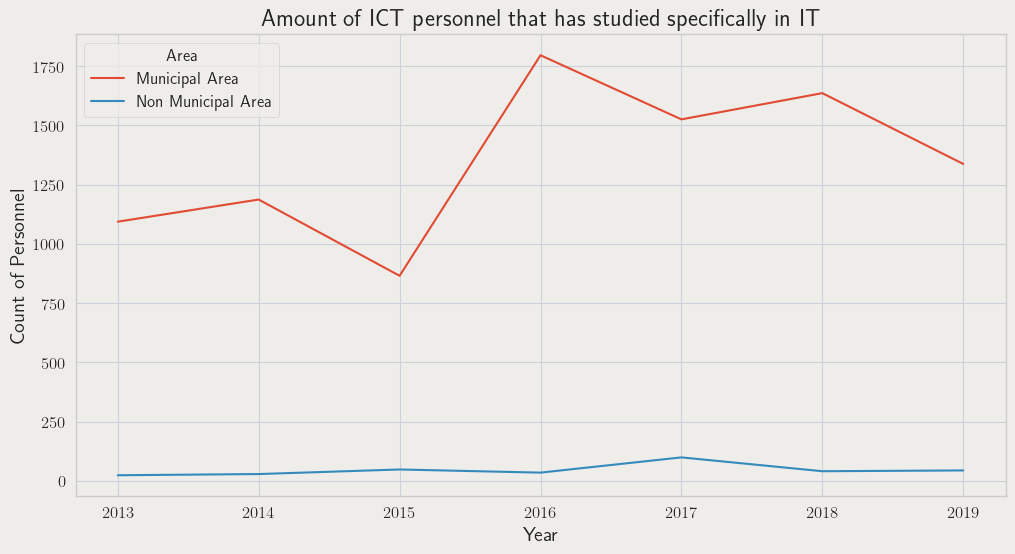

In [39]:
info_comm_data = estab_edu_df[(estab_edu_df['Economic activity'] == 'Information and Communication') & (estab_edu_df['Area'] != 'Total')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=info_comm_data, x='Year', y='Level of education IT personal (Total)', hue='Area', errorbar=None)
plt.title("Amount of ICT personnel that has studied specifically in IT", weight="bold")
plt.xlabel('Year', weight="bold")
plt.ylabel('Count of Personnel', weight="bold")

plt.savefig('ict-personnel-it.png', dpi=300)

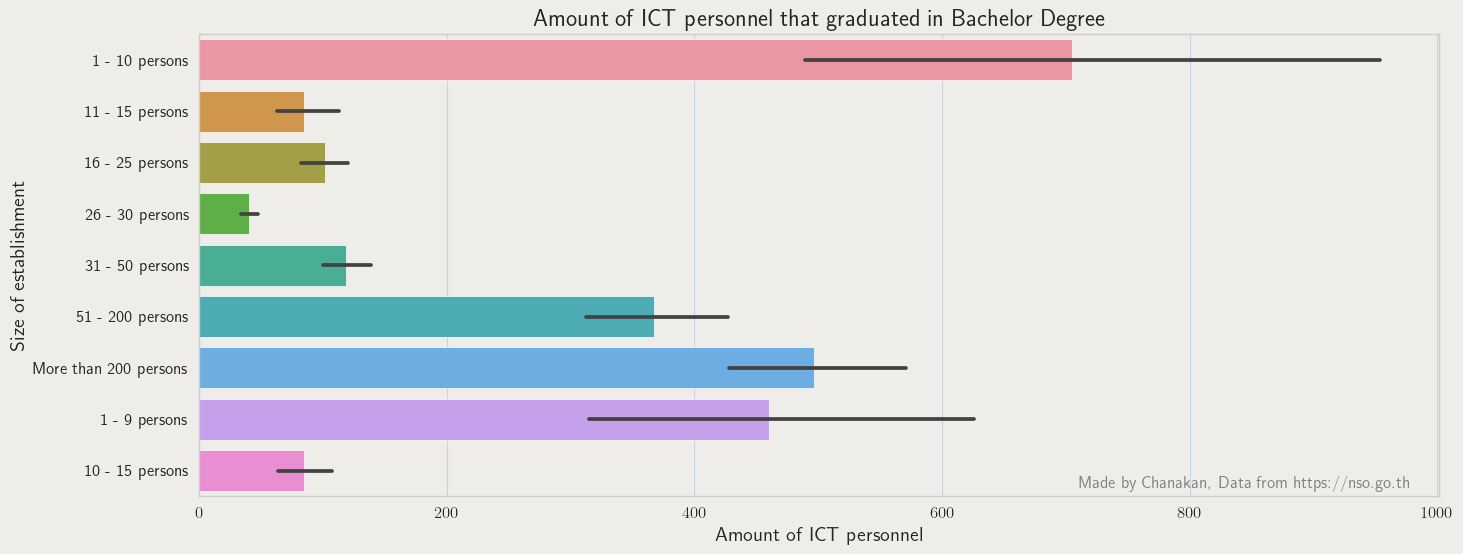

In [93]:
non_total_size_df = estab_edu_df[estab_edu_df['Size of establishment'] != 'Total']

plt.figure(figsize=(16, 6))
sns.barplot(x='Bachelor\'s degree', y='Size of establishment', data=non_total_size_df)
plt.title("Amount of ICT personnel that graduated in Bachelor Degree")
plt.xlabel("Amount of ICT personnel")
plt.text(0.71, 0.02, watermark_text, fontsize=12, color='gray', transform=plt.gca().transAxes)
plt.savefig('ict-personnel-bachelor.png', dpi=300)

## EDA on needed ICT personnel

In [11]:
needed_personnel

,Year,Area,Economic activity,Size of establishment,Division of industry,Number of establishments needing ICT personnel,Total of Need (ICT personnel ),Need - Chief Information Officer - CIO,Need - Information Technology Department Manager,Need - Computer System Designers and Analysts,Need - Computer Programmer,Need - Computer Associate Professionals,Need - Others
0,2020,1) Municipal Area,"01) Libraries, archives, museums and other ...",01) 1 - 10 persons,"91) Libraries, archives, museums and other cul...",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2020,1) Municipal Area,"01) Libraries, archives, museums and other ...",01) 1 - 10 persons,Total,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2020,1) Municipal Area,"01) Libraries, archives, museums and other ...",02) 11 - 15 persons,"91) Libraries, archives, museums and other cul...",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,2020,1) Municipal Area,"01) Libraries, archives, museums and other ...",02) 11 - 15 persons,Total,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,2020,1) Municipal Area,"01) Libraries, archives, museums and other ...",03) 16 - 25 persons,"91) Libraries, archives, museums and other cul...",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,2013,Total,06) Information and Communication,Total,60) Programming and broadcasting activities,5.2000,8.5333,2.0000,0.0000,5.5333,1.0000,0.0000,0.0000
11157,2013,Total,06) Information and Communication,Total,61) Telecommunications,72.7072,2242.7406,3.5714,10.2381,1313.1190,860.1881,49.9095,5.7145
11158,2013,Total,06) Information and Communication,Total,"62) Computer programming, consultancy and rela...",190.2221,1396.3830,14.2828,39.2346,416.8873,562.2160,282.9303,80.8320
11159,2013,Total,06) Information and Communication,Total,63) Information service activities,9.6666,26.9999,0.0000,0.0000,6.0000,4.6666,16.3333,0.0000


In [12]:
needed_personnel.dtypes

Year                                                  int64
Area                                                 object
Economic activity                                    object
Size of establishment                                object
Division of industry                                 object
Number of establishments needing ICT personnel      float64
Total of Need (ICT personnel )                      float64
Need - Chief Information Officer - CIO              float64
Need - Information Technology Department Manager    float64
Need - Computer System  Designers and Analysts      float64
Need - Computer Programmer                          float64
Need - Computer Associate Professionals             float64
Need - Others                                       float64
dtype: object

In [13]:
needed_personnel.duplicated().sum()

0

In [14]:
needed_personnel.isna().sum()

Year                                                0
Area                                                0
Economic activity                                   0
Size of establishment                               0
Division of industry                                0
Number of establishments needing ICT personnel      0
Total of Need (ICT personnel )                      0
Need - Chief Information Officer - CIO              0
Need - Information Technology Department Manager    0
Need - Computer System  Designers and Analysts      0
Need - Computer Programmer                          0
Need - Computer Associate Professionals             0
Need - Others                                       0
dtype: int64

In [30]:
columns_to_clean = ['Area', 'Economic activity', 'Size of establishment', 'Division of industry']

for column in columns_to_clean:
    needed_personnel[column] = needed_personnel[column].str.replace(r'^\d+\)\s+', '', regex=True)

In [31]:
needed_personnel

,Year,Area,Economic activity,Size of establishment,Division of industry,Number of establishments needing ICT personnel,Total of Need (ICT personnel ),Need - Chief Information Officer - CIO,Need - Information Technology Department Manager,Need - Computer System Designers and Analysts,Need - Computer Programmer,Need - Computer Associate Professionals,Need - Others
0,2020,Municipal Area,"Libraries, archives, museums and other cult...",1 - 10 persons,"Libraries, archives, museums and other cultura...",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2020,Municipal Area,"Libraries, archives, museums and other cult...",1 - 10 persons,Total,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2020,Municipal Area,"Libraries, archives, museums and other cult...",11 - 15 persons,"Libraries, archives, museums and other cultura...",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,2020,Municipal Area,"Libraries, archives, museums and other cult...",11 - 15 persons,Total,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,2020,Municipal Area,"Libraries, archives, museums and other cult...",16 - 25 persons,"Libraries, archives, museums and other cultura...",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,2013,Total,Information and Communication,Total,Programming and broadcasting activities,5.2000,8.5333,2.0000,0.0000,5.5333,1.0000,0.0000,0.0000
11157,2013,Total,Information and Communication,Total,Telecommunications,72.7072,2242.7406,3.5714,10.2381,1313.1190,860.1881,49.9095,5.7145
11158,2013,Total,Information and Communication,Total,"Computer programming, consultancy and related ...",190.2221,1396.3830,14.2828,39.2346,416.8873,562.2160,282.9303,80.8320
11159,2013,Total,Information and Communication,Total,Information service activities,9.6666,26.9999,0.0000,0.0000,6.0000,4.6666,16.3333,0.0000


In [17]:
needed_personnel['Economic activity'].unique()

array(['Libraries, archives, museums    and other cultural',
       'Manufacturing', 'Construction', 'Land Transport and Storage',
       'Private Hospital', 'Publishing', 'Telecommunication',
       'Business Trade and Services', 'Information and Communication'],
      dtype=object)

In [18]:
needed_personnel['Economic activity'] = needed_personnel['Economic activity'].str.replace('Libraries, archives, museums and other cultural', 'Libraries, archives, museums and other cultural')

# Visualizing Data

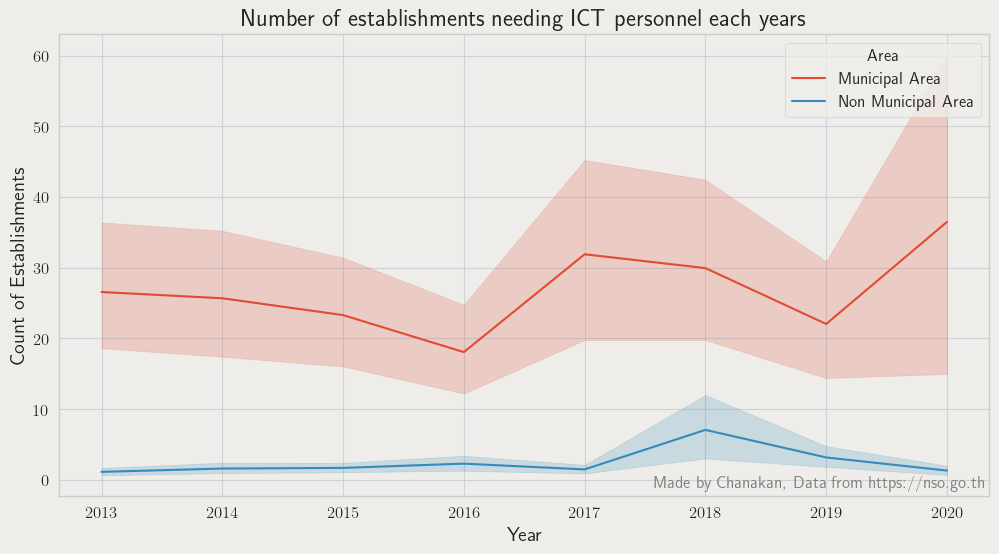

In [92]:
personnel_needed_data = needed_personnel[(needed_personnel['Area'] != 'Total') & ((needed_personnel['Economic activity'] != 'Business Trade and Services') & (needed_personnel['Economic activity'] != 'Manufacturing') & (needed_personnel['Economic activity'] != 'Libraries, archives, museums and other cultural'))]

plt.figure(figsize=(12, 6))
sns.lineplot(data=personnel_needed_data, x='Year', y='Number of establishments needing ICT personnel', hue='Area')
plt.title("Number of establishments needing ICT personnel each years")
plt.xlabel('Year')
plt.ylabel('Count of Establishments')

plt.text(0.64, 0.02, watermark_text, fontsize=12, color='gray', transform=plt.gca().transAxes)
plt.savefig('needed_ict_personnel_p_establishments.png', dpi=300)

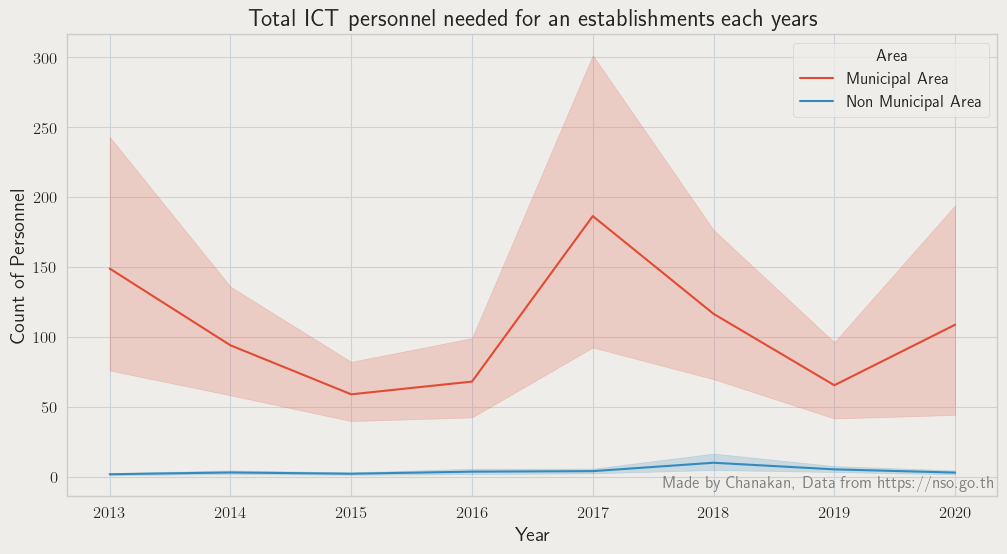

In [85]:
personnel_needed_data = needed_personnel[(needed_personnel['Area'] != 'Total') & ((needed_personnel['Economic activity'] != 'Business Trade and Services') & (needed_personnel['Economic activity'] != 'Manufacturing') & (needed_personnel['Economic activity'] != 'Libraries, archives, museums and other cultural'))]

plt.figure(figsize=(12, 6))
sns.lineplot(data=personnel_needed_data, x='Year', y='Total of Need (ICT personnel )', hue='Area')
plt.title("Total ICT personnel needed for an establishments each years")
plt.xlabel('Year')
plt.ylabel('Count of Personnel')
plt.text(0.64, 0.02, watermark_text, fontsize=12, color='gray', transform=plt.gca().transAxes)
plt.savefig('needed_ict_personnel.png', dpi=300)